In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pickle


In [3]:
def load_data_from_pickle(obj_name):
    '''
    load_data_from_pickle function loads and deserializes an object from a pickle file.

    Args:
        obj_name (str): The path to the pickle file containing the serialized object. 

    Returns:
        obj (pd.DataFrame): The deserialized object that was stored in the pickle file. 

    '''
    with open(obj_name, 'rb') as file:
        obj = pickle.load(file)
    return obj

In [4]:
X_train = load_data_from_pickle("/Users/sharanyasenthil/Downloads/data_processed_data_X_train.pkl")
y_train = load_data_from_pickle("/Users/sharanyasenthil/Downloads/data_processed_data_y_train.pkl")

In [5]:
X_test = load_data_from_pickle("/Users/sharanyasenthil/Downloads/data_processed_data_X_test.pkl")
y_test = load_data_from_pickle("/Users/sharanyasenthil/Downloads/data_processed_data_y_test.pkl")

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(585664, 18) (585664,) (193589, 18) (193589,)


In [7]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
train_df = pd.concat([X, y], axis=1)

majority_class = train_df[train_df['SepsisLabel'] == 0]
minority_class = train_df[train_df['SepsisLabel'] == 1]

majority_class_subset = majority_class.sample(n=2*len(minority_class))
train_df = pd.concat([majority_class_subset, minority_class])

X_train = train_df.drop('SepsisLabel', axis=1)
y_train = train_df['SepsisLabel']

X = train_df.drop('SepsisLabel', axis=1)
y = train_df['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((9395, 18), (9395,), (37576, 18), (37576,))

In [9]:
import requests

def send_post_request(url, data, headers=None):
    if headers is None:
        headers = {
            'Content-Type': 'application/json'
        }
    
    response = requests.post(url, json=data, headers=headers)
    
    if response.status_code == 200:
        print("Request was successful")
    else:
        print(f"Request failed with status code {response.status_code}")
    
    return response




In [39]:
url = "http://localhost:8085/predict" 
data = {
"data": X_test.iloc[:10,:].values.tolist(),
}

response = send_post_request(url, data)
print("Response:", response.json())


Request failed with status code 400
Response: {'error': 'Invalid input shape'}


In [12]:
X_test.iloc[0,:].values.tolist()

[-0.6478944656508806,
 0.2477501984834743,
 0.38259609079288515,
 -0.49008610186547774,
 -1.0701773176762106,
 -0.22003090353055435,
 1.0513384369512033,
 -0.41574693837126003,
 -1.1438867187926012,
 0.09602446907973813,
 0.23009028035426746,
 0.6317965084518705,
 0.2612444880484649,
 67.42,
 -5.33,
 13.0,
 0.0,
 1.0]

In [17]:
X.shape

(1000, 41)

In [54]:
def batch_predict(url, X_test, batch_size=500):
    predictions = []
    num_batches = (len(X_test) + batch_size - 1) // batch_size 

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(X_test))
        batch_data = X_test.iloc[start_idx:end_idx].replace([np.nan, np.inf, -np.inf], None).values.tolist()
        data = {
            "data": batch_data
        }
        response = send_post_request(url, data)
        if response.status_code == 200:
            predictions.extend(response.json().get('predictions', []))
        else:
            print(f"Batch {i+1} failed with status code {response.status_code}")
    
    return predictions

### Raw data

In [52]:
# Path to your CSV file
file_path = '/Users/sharanyasenthil/Downloads/data_modified_data_finalDataset-000000000000.csv'

# Load the first 1000 rows of the CSV file
df = pd.read_csv(file_path, nrows=1000)

# print(df.head())

In [53]:
X = df.drop(columns="SepsisLabel", axis=1)
y = df["SepsisLabel"]

In [55]:
url = "http://localhost:8085/predict"

predictions = batch_predict(url, X)
print("Predictions:", predictions)

Request was successful
Request was successful
Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [56]:
import matplotlib.pyplot as plt

In [58]:
X.values.to_cli

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,Patient_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,1,p000002
1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,2,p000002
2,64.0,98.0,NaN,125.0,64.0,41.0,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,3,p000002
3,56.0,100.0,NaN,123.0,65.0,41.0,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,4,p000002
4,66.0,99.0,NaN,120.0,67.0,43.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,5,p000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,83.0,100.0,NaN,129.0,76.0,50.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.26,0,0.0,1.0,-135.81,7,p000022
996,80.0,99.0,NaN,89.0,57.0,41.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.26,0,0.0,1.0,-135.81,8,p000022
997,79.5,100.0,NaN,143.0,84.0,52.5,19.0,NaN,-3.0,NaN,...,NaN,NaN,NaN,77.26,0,0.0,1.0,-135.81,9,p000022
998,85.0,100.0,NaN,161.0,92.0,56.0,18.0,NaN,-3.0,NaN,...,NaN,NaN,NaN,77.26,0,0.0,1.0,-135.81,10,p000022


(array([899.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

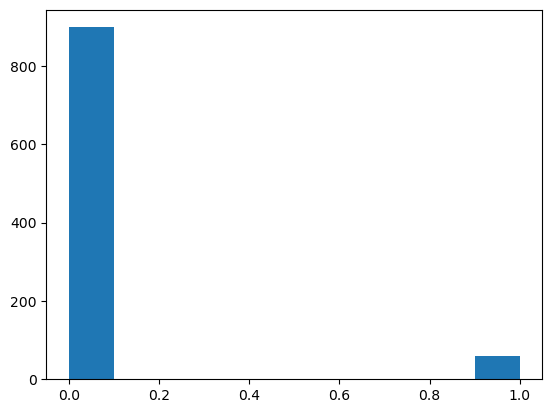

In [57]:
plt.hist(predictions)

In [34]:
def batch_predict(url, X_test, batch_size=500):
    predictions = []
    num_batches = (len(X_test) + batch_size - 1) // batch_size 

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(X_test))
        batch_data = X_test.iloc[start_idx:end_idx].values.tolist()
        
        data = {
            "data": batch_data
        }
        print(batch_data)